In [1]:
import sys,os,time

import tables as tb
import yaml
import numpy as np
import matplotlib.pyplot as plt
import tjmonopix.tjmonopix
import tjmonopix.scans.th_scan as th_scan
import tjmonopix.scans.source_scan as source_scan

#### how to power
# PWELL/PSUB 0V/200uA, HV0V/100uA 
# PWELL/PSUB -6V/200uA --> MIO3 6V, GAPC 5V --> run this cell
# HV 1.8V/100uA --> PWELL/PSUB 0V/200uA --> HV 20V

#HV 2V/, Psub/Pwell -6V 14/03/22

DUtoe=33.
chip=tjmonopix.tjmonopix.TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=False) #con la configurazione settata da errore. Controllare se le configurazioni sono le stesse
#vecchia conf: /home/user/workspace/tjmonopix/tjmonopix_30/tjmonopix/tjmonopix_mio3.yaml"
chip.init("EN_HV")

2022-03-14 18:16:35,071 [INFO ] (MainThread) GPAC: power reset
2022-03-14 18:16:36,831 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 3
2022-03-14 18:16:37,061 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2022-03-14 18:16:37,321 [INFO ] (MainThread) ibias = 45
2022-03-14 18:16:37,341 [INFO ] (MainThread) ibias = 503.125 nA
2022-03-14 18:16:37,970 [INFO ] (MainThread) {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 2.502471747485684, 'VDDP [V]': 1.8049802771084336, 'VDDP OC': False, 'VDDA [mA]': 50.151368865825674, 'VDDD [V]': 1.8025130343434344, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 128.39714805315754, 'BiasSF [V]': 1.0622801785996314, 'VDDD OC': False, 'VPC [mA]': -0.31249861803761275, 'VPCSWSF [mA]': 0.18809333715255658, 'VDDA [V]': 1.8068556096096098, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8055460239760242, 'BiasSF [mA]': 0.10109892318840588}


In [2]:
# reset configuration
chip.default_conf()
chip.reset_ibias()

2022-03-14 18:16:43,710 [INFO ] (MainThread) ibias = 45
2022-03-14 18:16:43,730 [INFO ] (MainThread) ibias = 503.125 nA


In [3]:
####### CONFIGURE THE FRONT END ######
# INPUT baseline
chip.reset_ibias()
chip.set_vreset_dacunits(35,1) #1V
# OUTPUT BASELINE
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias
chip.set_vcasn_dac_dacunits(40)
# INOUT RESET rate
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01
# OUTPUT RESET rate
chip.set_ithr_dacunits(10,1)  #680pA
# BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(40,1)  #500nA
# DC current of Amp, OUTPUT RISE TIME
chip.set_ibias_dacunits(20,1) #500nA
chip.write_conf()

2022-03-14 18:16:46,950 [INFO ] (MainThread) vreset = 1.05106299213V
2022-03-14 18:16:46,970 [INFO ] (MainThread) icasn = 0
2022-03-14 18:16:46,990 [INFO ] (MainThread) icasn = 4.375 nA
2022-03-14 18:16:47,010 [INFO ] (MainThread) ireset = 2 high leakage mode
2022-03-14 18:16:47,030 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2022-03-14 18:16:47,051 [INFO ] (MainThread) ithr = 10
2022-03-14 18:16:47,071 [INFO ] (MainThread) ithr = 1.50390625 nA
2022-03-14 18:16:47,091 [INFO ] (MainThread) idb = 40
2022-03-14 18:16:47,111 [INFO ] (MainThread) idb = 717.5 nA
2022-03-14 18:16:47,131 [INFO ] (MainThread) ibias = 20
2022-03-14 18:16:47,151 [INFO ] (MainThread) ibias = 229.6875 nA


Enable MASKH 50
Got 13018 hits, total noisy pixels: 53
Enable MASKH 100
Got 28348 hits, total noisy pixels: 128
Enable MASKH 150
Got 21900 hits, total noisy pixels: 188
Enable MASKH 200
Got 33580 hits, total noisy pixels: 267
Enable MASKH 223
Got 25794 hits, total noisy pixels: 301
Enable MASKV 50
Got 5 hits, total noisy pixels: 301
Enable MASKV 100
Got 10 hits, total noisy pixels: 303
Enable MASKV 111
Got 16 hits, total noisy pixels: 306
Enable MASKD 50
Got 12 hits, total noisy pixels: 307
Enable MASKD 100
Got 5 hits, total noisy pixels: 307
Enable MASKD 150
Got 8 hits, total noisy pixels: 307
Enable MASKD 200
Got 10 hits, total noisy pixels: 308
Enable MASKD 250
Got 10 hits, total noisy pixels: 311
Enable MASKD 300
Got 5 hits, total noisy pixels: 311
Enable MASKD 350
Got 15 hits, total noisy pixels: 312
Enable MASKD 400
Got 18 hits, total noisy pixels: 316
Enable MASKD 447
Got 27 hits, total noisy pixels: 320
Checking again after masking
Got 21 hits, total noisy pixels: 323
Noisy pix

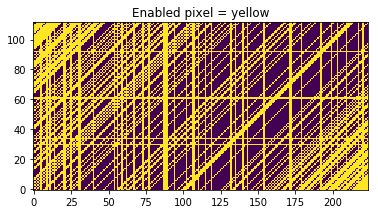

In [6]:
#### enable pixels and mask noisy pixels
#P0 V, HV 10 V
chip.set_monoread()
noisy=chip.auto_mask(dt=0.002)

mask=chip.get_pixel_status(mask=None,mode="all")
plt.imshow(chip.get_pixel_status(mask=mask,mode="preamp")[3,:,:],
           interpolation="none",origin="bottomleft")
plt.title("Enabled pixel = yellow");

Enable MASKH 50
Got 105850 hits, total noisy pixels: 79
Enable MASKH 100
Got 169968 hits, total noisy pixels: 173
Enable MASKH 150
Got 126290 hits, total noisy pixels: 263
Enable MASKH 200
Got 178607 hits, total noisy pixels: 367
Enable MASKH 223
Got 174714 hits, total noisy pixels: 411
Enable MASKV 50
Got 13 hits, total noisy pixels: 414
Enable MASKV 100
Got 11 hits, total noisy pixels: 417
Enable MASKV 111
Got 7 hits, total noisy pixels: 417
Enable MASKD 50
Got 1 hits, total noisy pixels: 417
Enable MASKD 100
Got 6 hits, total noisy pixels: 417
Enable MASKD 150
Got 3 hits, total noisy pixels: 417
Enable MASKD 200
Got 7 hits, total noisy pixels: 417
Enable MASKD 250
Got 9 hits, total noisy pixels: 419
Enable MASKD 300
Got 22 hits, total noisy pixels: 422
Enable MASKD 350
Got 6 hits, total noisy pixels: 422
Enable MASKD 400
Got 16 hits, total noisy pixels: 425
Enable MASKD 447
Got 27 hits, total noisy pixels: 431
Checking again after masking
Got 8 hits, total noisy pixels: 431
Noisy pi

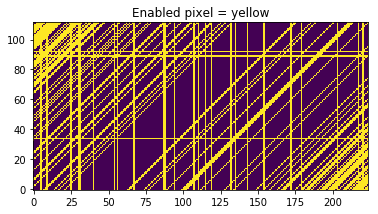

In [5]:
#### enable pixels and mask noisy pixels
#Pwell, psub 0 V, HV 15 V

chip.set_monoread()
noisy=chip.auto_mask()

mask=chip.get_pixel_status(mask=None,mode="all")
plt.imshow(chip.get_pixel_status(mask=mask,mode="preamp")[3,:,:],
           interpolation="none",origin="bottomleft")
plt.title("Enabled pixel = yellow");

In [ ]:
#### enable pixels and mask noisy pixels
#Pwell, psub 0 V, HV  20 V

chip.set_monoread()
noisy=chip.auto_mask()

mask=chip.get_pixel_status(mask=None,mode="all")
plt.imshow(chip.get_pixel_status(mask=mask,mode="preamp")[3,:,:],
           interpolation="none",origin="bottomleft")
plt.title("Enabled pixel = yellow");